<a href="https://www.kaggle.com/code/vedatgul/data-scientist-salary-prediction-score-0-93?scriptVersionId=147664001" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

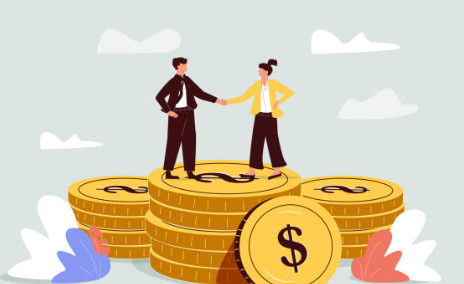

# <span style="color:#2D7680"> Table of Contents </span>

[<span style="color:#2D7680">   1. Examine the Dataset  </span>](#Exa)

[<span style="color:#2D7680">   2. Data Preparation  </span>](#Dat)

[<span style="color:#2D7680">   3. Feature Engineering  </span>](#Fea)

[<span style="color:#2D7680">   4. Modeling  </span>](#Mod)


#  <span style="color:#2D7680"> 1. Examine the Dataset </span> <a class="anchor" id="Exa"></a> 

Data is everywhere today, everything from a like on Instagram to a bank transaction generates data, and with so much data in the world, the problem of managing it arises. This is where Data Science comes into play. Data Science is a field that manages, researches, analyzes data so that it can provide meaningful information to the layman. One of the most popular professions of the 21st century. With such a demanding field, it's clear that there are a lot of data scientists out there. This dataset contains some information about data scientists working in various companies in the sector.

The data set consists of 11 variables and 607 observations and 210.08 kb.

**• work_year** The year the salary was paid.

**• experience_level** At work during the year with the following possible values

    • EN- Entry-level

    • MI- Junior Mid-level
    
    • SE- Intermediate Senior-level

    • EX- Expert Executive-level 

**• employment_type** 

    • PT- Part-time

    • FT- Full-time

    • CT- Contract

    • FL- Freelance

**• job_title** 

**• salary**

**• salary_currency:**

**• salary_in_usd:**

**• employee_residence**

**• remote_ratio** 

     • 0- ON-Site
     
     • 50- Hybrid
     
     • 100- Remote 

**• company_location** 

**• company_size**

      • S- Less than 50 Employess (small)
      
      • M- 50 to 250 Employess (medium)
      
      • L- More than 250 Employees (large)


# <span style="color:#2D7680"> 2. Data Preparation </span> <a class="anchor" id="Dat"></a> 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import normalize, scale
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# Loading datasets

df = pd.read_csv('/kaggle/input/data-science-job-salaries/ds_salaries.csv')
del df["Unnamed: 0"]
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [4]:
df.shape

(607, 11)

In [5]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

**6 en popüler mesleğin seçilmesi**

In [6]:
df["job_title"].value_counts()[:6]

Data Scientist               143
Data Engineer                132
Data Analyst                  97
Machine Learning Engineer     41
Research Scientist            16
Data Science Manager          12
Name: job_title, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [8]:
job = ["Data Engineer", "Data Scientist","Data Analyst", "Machine Learning Engineer" , "Research Scientist"]
new=[col for col in df.index if df.job_title[col] in job]

df=df.loc[new,]
df = df.reset_index()
del df["index"]
df.shape

(429, 11)

In [9]:
df_fea=df

# <span style="color:#2D7680"> 3. Feature Engineering </span> <a class="anchor" id="Fea"></a> 

In [10]:
df_fea.company_size = df_fea.company_size.replace({'S':1 ,'M': 2, 'L': 3})
df_fea['remote_ratio'] = df_fea['remote_ratio'].replace({100: 3, 50: 2, 0: 1})
df_fea['experience_level'] = df_fea['experience_level'].replace({'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4})
df_fea['employment_type'] = df_fea['employment_type'].replace({'FL':1 ,'PT': 2, 'FT': 3, 'CT': 4,})

In [11]:
# Çalışan ve Şirket lokasyonuna göre değşken üretilmesi
a = []
for (i, j) in zip(df_fea['employee_residence'], df_fea['company_location']):
    if i == j:
        a.append('Yes')
    else:
        a.append('No')

df_fea['new_work_own_country'] = a
df_fea.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,new_work_own_country
0,2020,2,3,Data Scientist,70000,EUR,79833,DE,1,DE,3,Yes
1,2020,3,3,Machine Learning Engineer,150000,USD,150000,US,2,US,3,Yes
2,2020,1,3,Data Analyst,72000,USD,72000,US,3,US,3,Yes
3,2020,2,3,Data Scientist,11000000,HUF,35735,HU,2,HU,3,Yes
4,2020,1,3,Data Scientist,45000,EUR,51321,FR,1,FR,1,Yes


In [12]:
# Kategorik değişkenlere göre sınıflandırma"
x=df_fea
x = x.astype(str)
x["new_cluster"] = ['_'.join(i) for i in x.drop(["salary","salary_in_usd"], axis=1).values]
x = x['new_cluster']
df_fea["new_cluster"]=x
df_fea.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,new_work_own_country,new_cluster
0,2020,2,3,Data Scientist,70000,EUR,79833,DE,1,DE,3,Yes,2020_2_3_Data Scientist_EUR_DE_1_DE_3_Yes
1,2020,3,3,Machine Learning Engineer,150000,USD,150000,US,2,US,3,Yes,2020_3_3_Machine Learning Engineer_USD_US_2_US...
2,2020,1,3,Data Analyst,72000,USD,72000,US,3,US,3,Yes,2020_1_3_Data Analyst_USD_US_3_US_3_Yes
3,2020,2,3,Data Scientist,11000000,HUF,35735,HU,2,HU,3,Yes,2020_2_3_Data Scientist_HUF_HU_2_HU_3_Yes
4,2020,1,3,Data Scientist,45000,EUR,51321,FR,1,FR,1,Yes,2020_1_3_Data Scientist_EUR_FR_1_FR_1_Yes


In [13]:
df_fea.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,new_work_own_country,new_cluster
0,2020,2,3,Data Scientist,70000,EUR,79833,DE,1,DE,3,Yes,2020_2_3_Data Scientist_EUR_DE_1_DE_3_Yes
1,2020,3,3,Machine Learning Engineer,150000,USD,150000,US,2,US,3,Yes,2020_3_3_Machine Learning Engineer_USD_US_2_US...
2,2020,1,3,Data Analyst,72000,USD,72000,US,3,US,3,Yes,2020_1_3_Data Analyst_USD_US_3_US_3_Yes
3,2020,2,3,Data Scientist,11000000,HUF,35735,HU,2,HU,3,Yes,2020_2_3_Data Scientist_HUF_HU_2_HU_3_Yes
4,2020,1,3,Data Scientist,45000,EUR,51321,FR,1,FR,1,Yes,2020_1_3_Data Scientist_EUR_FR_1_FR_1_Yes


In [14]:
df_fea["salary_in_usd"].describe([.20, .40,.95, .99, .100]).T

count      429.000
mean    105840.524
std      59221.585
min       2859.000
10%      38585.800
20%      54445.200
40%      85000.000
50%     100000.000
95%     210000.000
99%     248292.000
max     450000.000
Name: salary_in_usd, dtype: float64

In [15]:
outliers = df_fea.quantile(.99)

df_fea = df_fea[(df_fea['salary_in_usd']<outliers['salary_in_usd'])]

In [16]:
df_fea["salary_in_usd"].describe([.20, .40,.95, .99, .100]).T

count      424.000
mean    103088.644
std      53119.007
min       2859.000
10%      38110.300
20%      53676.800
40%      84920.000
50%      99075.000
95%     205300.000
99%     220110.000
max     243900.000
Name: salary_in_usd, dtype: float64

In [17]:
# Mean_Salary, min_salary,max_salary değşkenlerinin oluşturulması

df_fea['new_country_mean_salary'] = df_fea.groupby(['work_year','experience_level','employment_type','job_title','employee_residence','remote_ratio','company_location','company_size','new_work_own_country'])['salary_in_usd'].transform('mean')
df_fea['new_country_min_salary'] = df_fea.groupby(['work_year','experience_level','employment_type','job_title','employee_residence','remote_ratio','company_location','company_size','new_work_own_country'])['salary_in_usd'].transform('min')  
df_fea['new_country_max_salary'] = df_fea.groupby(['work_year','experience_level','employment_type','job_title','employee_residence','remote_ratio','company_location','company_size','new_work_own_country'])['salary_in_usd'].transform('max')

In [18]:
df_fea.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,new_work_own_country,new_cluster,new_country_mean_salary,new_country_min_salary,new_country_max_salary
0,2020,2,3,Data Scientist,70000,EUR,79833,DE,1,DE,3,Yes,2020_2_3_Data Scientist_EUR_DE_1_DE_3_Yes,79833.000,79833,79833
1,2020,3,3,Machine Learning Engineer,150000,USD,150000,US,2,US,3,Yes,2020_3_3_Machine Learning Engineer_USD_US_2_US...,150000.000,150000,150000
2,2020,1,3,Data Analyst,72000,USD,72000,US,3,US,3,Yes,2020_1_3_Data Analyst_USD_US_3_US_3_Yes,81500.000,72000,91000
3,2020,2,3,Data Scientist,11000000,HUF,35735,HU,2,HU,3,Yes,2020_2_3_Data Scientist_HUF_HU_2_HU_3_Yes,35735.000,35735,35735
4,2020,1,3,Data Scientist,45000,EUR,51321,FR,1,FR,1,Yes,2020_1_3_Data Scientist_EUR_FR_1_FR_1_Yes,51321.000,51321,51321


In [19]:
df_fea.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424 entries, 0 to 428
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   work_year                424 non-null    int64  
 1   experience_level         424 non-null    int64  
 2   employment_type          424 non-null    int64  
 3   job_title                424 non-null    object 
 4   salary                   424 non-null    int64  
 5   salary_currency          424 non-null    object 
 6   salary_in_usd            424 non-null    int64  
 7   employee_residence       424 non-null    object 
 8   remote_ratio             424 non-null    int64  
 9   company_location         424 non-null    object 
 10  company_size             424 non-null    int64  
 11  new_work_own_country     424 non-null    object 
 12  new_cluster              424 non-null    object 
 13  new_country_mean_salary  424 non-null    float64
 14  new_country_min_salary   4

In [20]:
# Rare Encoder implementation

def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()

    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]

    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])

    return temp_df

In [21]:
df_fea=rare_encoder(df_fea, 0.01)
df_fea.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,new_work_own_country,new_cluster,new_country_mean_salary,new_country_min_salary,new_country_max_salary
0,2020,2,3,Data Scientist,70000,EUR,79833,DE,1,DE,3,Yes,Rare,79833.000,79833,79833
1,2020,3,3,Machine Learning Engineer,150000,USD,150000,US,2,US,3,Yes,Rare,150000.000,150000,150000
2,2020,1,3,Data Analyst,72000,USD,72000,US,3,US,3,Yes,Rare,81500.000,72000,91000
3,2020,2,3,Data Scientist,11000000,Rare,35735,Rare,2,Rare,3,Yes,Rare,35735.000,35735,35735
4,2020,1,3,Data Scientist,45000,EUR,51321,FR,1,FR,1,Yes,Rare,51321.000,51321,51321


In [22]:
df_fea.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424 entries, 0 to 428
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   work_year                424 non-null    int64  
 1   experience_level         424 non-null    int64  
 2   employment_type          424 non-null    int64  
 3   job_title                424 non-null    object 
 4   salary                   424 non-null    int64  
 5   salary_currency          424 non-null    object 
 6   salary_in_usd            424 non-null    int64  
 7   employee_residence       424 non-null    object 
 8   remote_ratio             424 non-null    int64  
 9   company_location         424 non-null    object 
 10  company_size             424 non-null    int64  
 11  new_work_own_country     424 non-null    object 
 12  new_cluster              424 non-null    object 
 13  new_country_mean_salary  424 non-null    float64
 14  new_country_min_salary   4

In [23]:
# One hot encoder implementation

cats = df_fea.select_dtypes(include="object").columns
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

cols = [col for col in df_fea.columns if 10 >= df_fea[col].nunique() > 2]

df_fea = one_hot_encoder(df_fea, cats)

df_fea.head()

,work_year,experience_level,employment_type,salary,salary_in_usd,remote_ratio,company_size,new_country_mean_salary,new_country_min_salary,new_country_max_salary,job_title_Data Engineer,job_title_Data Scientist,job_title_Machine Learning Engineer,job_title_Research Scientist,salary_currency_EUR,salary_currency_GBP,salary_currency_INR,salary_currency_Rare,salary_currency_USD,employee_residence_DE,employee_residence_ES,employee_residence_FR,employee_residence_GB,employee_residence_GR,employee_residence_IN,employee_residence_NL,employee_residence_Rare,employee_residence_US,company_location_DE,company_location_ES,company_location_FR,company_location_GB,company_location_GR,company_location_IN,company_location_Rare,company_location_US,new_work_own_country_Yes,new_cluster_2022_2_3_Data Engineer_GBP_GB_3_GB_2_Yes,new_cluster_2022_2_3_Data Scientist_GBP_GB_1_GB_2_Yes,new_cluster_2022_2_3_Data Scientist_USD_US_3_US_2_Yes,new_cluster_2022_3_3_Data Analyst_USD_US_1_US_2_Yes,new_cluster_2022_3_3_Data Analyst_USD_US_3_US_2_Yes,new_cluster_2022_3_3_Data Engineer_USD_US_1_US_2_Yes,new_cluster_2022_3_3_Data Engineer_USD_US_3_US_2_Yes,new_cluster_2022_3_3_Data Engineer_USD_US_3_US_3_Yes,new_cluster_2022_3_3_Data Scientist_USD_US_1_US_2_Yes,new_cluster_2022_3_3_Data Scientist_USD_US_1_US_3_Yes,new_cluster_2022_3_3_Data Scientist_USD_US_3_US_2_Yes,new_cluster_Rare
0,2020,2,3,70000,79833,1,3,79833.000,79833,79833,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,2020,3,3,150000,150000,2,3,150000.000,150000,150000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
2,2020,1,3,72000,72000,3,3,81500.000,72000,91000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
3,2020,2,3,11000000,35735,2,3,35735.000,35735,35735,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,2020,1,3,45000,51321,1,1,51321.000,51321,51321,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


# <span style="color:#2D7680"> 4. Modelling </span> <a class="anchor" id="Mod"></a> 

In [24]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()
#scaler_s = StandardScaler()
#scaler_r = RobustScaler()

df_fea= df_fea.drop(["salary"], axis=1)
y=df_fea['salary_in_usd']
X=df_fea.drop(['salary_in_usd'],axis=1)
m=X
X = scaler.fit_transform(X)
y= y.values.reshape(-1,1)
y = np.log(y)


def regression_(x, y):
    rf=RandomForestRegressor()
    lg = LGBMRegressor()
    kn = KNeighborsRegressor()
    et = ExtraTreeRegressor()
    gb = GradientBoostingRegressor()
    dt = DecisionTreeRegressor()
    xgb = XGBRegressor()

    algos = [rf,lg , kn, et, gb, dt,xgb]
    algos_names = ["Random Forest","LGBM", 'KNeighbors', 'ExtraTree', 'GradientBoosting',
                   'DecisionTree','XGB']

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

    r_score = []
    mse = []
    mae = []

    result = pd.DataFrame(columns=['R_square', 'MSE', 'MAE'], index=algos_names)

    for algo in algos:
        pred = algo.fit(X_train, y_train).predict(X_test)
        r_score.append(r2_score(y_test, pred))
        mse.append(mean_squared_error(y_test, pred) ** .5)
        mae.append(mean_absolute_error(y_test, pred))

    result.R_square = r_score
    result.MSE = mse
    result.MAE = mae

    return result.sort_values('R_square', ascending=False)

In [25]:
 regression_(X, y)

,R_square,MSE,MAE
GradientBoosting,0.924,0.206,0.139
Random Forest,0.919,0.212,0.142
XGB,0.913,0.220,0.153
DecisionTree,0.911,0.222,0.155
ExtraTree,0.911,0.223,0.161
LGBM,0.857,0.282,0.173
KNeighbors,0.625,0.456,0.302


# HyperParameter Optimization


In [26]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [27]:
gbm_model=GradientBoostingRegressor()

In [28]:
gbm_params = { 
    'n_estimators': [100, 500],
    'subsample': [1,0.5],
    'max_depth' : [3,8],
    "learning_rate": [0.01,0.1]
}

In [29]:
gbm_best_grid = GridSearchCV(gbm_model,gbm_params, cv=5,n_jobs=-1, verbose=True).fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [30]:
gbm_best_grid.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.5}

In [31]:
final=gbm_model.set_params(**gbm_best_grid.best_params_,random_state=17).fit(X_train,y_train)

In [32]:
final_test=final.predict(X_test)

In [33]:
r2_score(y_test,final_test)

0.9337018498661617

In [34]:
mean_squared_error(y_test, final_test) ** .5


0.1917835324777098

In [35]:
mean_absolute_error(y_test, final_test)

0.13016303589711406

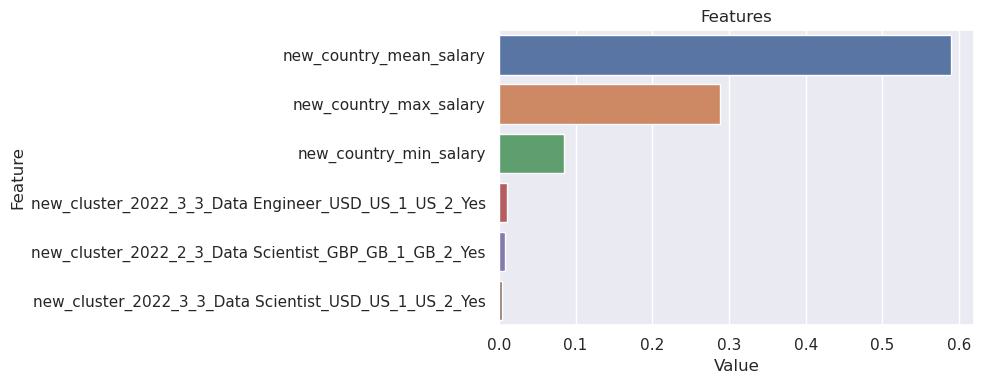

In [36]:
# Variable severity

def plot_importance(model, features, num=6, save=False):

    feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": features.columns})
    plt.figure(figsize=(10, 4))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title("Features")
    plt.tight_layout()
    plt.show()

plot_importance(final, m)